# Task 1 (Member):

In [1066]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

# Show plots directly in notebook
%matplotlib inline

# Importing data to be used through out the tasks
population_import = pd.read_csv('../../../data/stage_1/covid_county_population_usafacts.csv')
confirmed_import = pd.read_csv('../../../data/stage_1/covid_confirmed_usafacts.csv')
deaths_import = pd.read_csv('../../../data/stage_1/covid_deaths_usafacts.csv')

In [1067]:
# Picking FL for regression models
confirmed_cases_FL = confirmed_import[confirmed_import['State']=='FL']

# Getting rid of 'Statewide Unallocated'
confirmed_cases_FL = confirmed_cases_FL[confirmed_cases_FL.countyFIPS > 0]
confirmed_cases_FL = confirmed_cases_FL.drop(columns=['stateFIPS'])

# Only keeping days since first infections
confirmed_cases_FL = confirmed_cases_FL.drop(confirmed_cases_FL.loc[:, '1/22/20':'3/1/20'].columns, axis = 1)

# Setting the index
confirmed_cases_FL = confirmed_cases_FL.set_index(['countyFIPS','County Name','State'])

confirmed_cases_FL

,,,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,...,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20
countyFIPS,County Name,State,,,,,,,,,,,,,,,,,,,,,
12001,Alachua County,FL,0,0,0,0,0,0,0,0,1,1,...,10996,11047,11082,11123,11261,11347,11450,11554,11631,11651
12003,Baker County,FL,0,0,0,0,0,0,0,0,0,0,...,1840,1844,1847,1852,1856,1869,1872,1880,1888,1893
12005,Bay County,FL,0,0,0,0,0,0,0,0,0,0,...,7060,7087,7108,7139,7219,7279,7350,7389,7440,7504
12007,Bradford County,FL,0,0,0,0,0,0,0,0,0,0,...,1254,1258,1259,1267,1271,1279,1289,1292,1295,1296
12009,Brevard County,FL,0,0,0,0,0,0,0,0,0,0,...,12318,12429,12572,12680,12780,12925,13092,13167,13312,13452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,Union County,FL,0,0,0,0,0,0,0,0,0,0,...,1172,1174,1175,1177,1180,1187,1190,1190,1190,1191
12127,Volusia County,FL,0,0,0,0,0,0,1,2,2,2,...,13360,13439,13557,13653,13748,13828,13937,13986,14117,14158
12129,Wakulla County,FL,0,0,0,0,0,0,0,0,0,0,...,1357,1369,1374,1386,1387,1407,1418,1430,1446,1448


In [1068]:
# Grabbing the sum of cases across FL
cc_FL_sum = confirmed_cases_FL.sum()

cc_FL_sum

3/2/20           1
3/3/20           1
3/4/20           1
3/5/20           2
3/6/20           2
             ...  
11/10/20    850147
11/11/20    855950
11/12/20    861562
11/13/20    868496
11/14/20    873020
Length: 258, dtype: int64

In [1069]:
# Creating dataframe for FL
cases_FL = pd.DataFrame({'Cases':cc_FL_sum})
cases_FL['Days Since 1st Case'] = range(len(cases_FL))
cases_FL.Cases = cases_FL.Cases.diff().fillna(0)
cases_FL

,Cases,Days Since 1st Case
3/2/20,0.0,0
3/3/20,0.0,1
3/4/20,0.0,2
3/5/20,1.0,3
3/6/20,0.0,4
...,...,...
11/10/20,4354.0,253
11/11/20,5803.0,254
11/12/20,5612.0,255
11/13/20,6934.0,256


<AxesSubplot:xlabel='Days Since 1st Case', ylabel='Cases'>

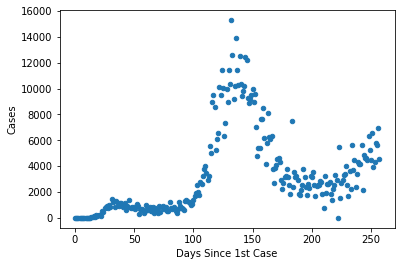

In [1070]:
cases_FL.plot.scatter(x='Days Since 1st Case', y='Cases')

<b>Basic scatter plot for weekly cases across FL</b>

In [1071]:
# Correlation coefficients
cases_FL.corr()

,Cases,Days Since 1st Case
Cases,1.000000,0.411752
Days Since 1st Case,0.411752,1.000000


In [1072]:
# Make variables 
days_since_cases = pd.DataFrame(cases_FL['Days Since 1st Case'])
FL_cases = pd.DataFrame(cases_FL['Cases'])

In [1073]:
# Build Linear Regression Model
lm = linear_model.LinearRegression()
model = lm.fit(days_since_cases, FL_cases)

In [1074]:
print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))
print('Score: {}'.format(model.score(days_since_cases, FL_cases)))

Intercept: [1039.05186914]
Coefficient: [[18.24702494]]
Score: 0.169539652508231


In [1075]:
# Predict values for the linear regression line
FL_cases_predict = model.predict(days_since_cases)

Text(0, 0.5, 'FL Cases')

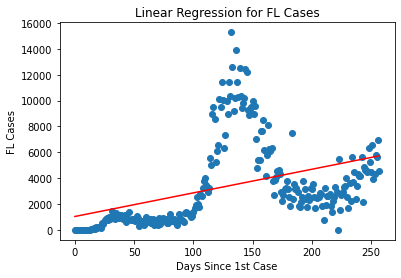

In [1076]:
# plotting upper and lower confidence intervals:
# from statsmodels.sandbox.regression.predstd import wls_prediction_std
# _, upper,lower = wls_prediction_std(model)
#Plot the linear regression line
plt.scatter(days_since_cases, FL_cases)
plt.plot(days_since_cases, FL_cases_predict, color='red')
# plt.plot(days_since_cases,upper,'--',label="Upper")
# plt.plot(days_since_cases,lower,':',label="Lower")
plt.title("Linear Regression for FL Cases")
plt.xlabel("Days Since 1st Case")
plt.ylabel("FL Cases")

In [1077]:
# df = pd.concat([days_since_cases, FL_cases]).reset_index(drop=True)
# 
# sns.relplot(data=df,x = "Days Since 1st Case", y = "FL Cases")

In [1078]:
# Now to do polynomial regression for FL cases
from sklearn.preprocessing import PolynomialFeatures

polynom = PolynomialFeatures(degree = 2)
FL_cases_polynom = polynom.fit_transform(FL_cases)

FL_cases_polynom

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01],
       [1.00000000e+00, 1.10000000e+01, 1.21000000e+02],
       [1.00000000e+00, 6.00000000e+00, 3.60000000e+01],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02],
       [1.00000000e+00, 2.30000000e+01, 5.29000000e+02],
       [1.00000000e+00, 3.20000000e+01, 1.02400000e+03],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01],
       [1.00000000e+00, 3.80000000e+01, 1.44400000e+03],
       [1.00000000e+00, 7.30000000e+01, 5.32900000e+03],
       [1.00000000e+00, 1.17000000e+02, 1.36890000e+04],
       [1.00000000e+00, 1.01000

In [1079]:
# Fitting the model for polynomial regression
PolyReg = linear_model.LinearRegression()
PolyReg.fit(FL_cases_polynom, FL_cases_predict)

LinearRegression()

Text(0, 0.5, 'FL Cases')

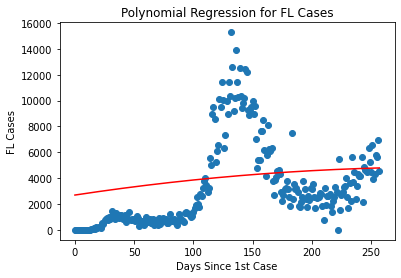

In [1080]:
# Visualize the polynomial regression line
#Plot the linear regression line
plt.scatter(days_since_cases, FL_cases)

#plt.plot(weeks_since_cases, PolyReg.predict(polynom.fit_transform(FL_cases)), color='red')
plt.plot(days_since_cases, PolyReg.predict(polynom.fit_transform(FL_cases_predict)), color='red')
plt.title("Polynomial Regression for FL Cases")
plt.xlabel("Days Since 1st Case")
plt.ylabel("FL Cases")

In [1081]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Printing the RMSE
print('RMSE of FL cases: {}'.format(sqrt(mean_squared_error(FL_cases, FL_cases_predict))))

RMSE of FL cases: 3007.749701096412


<b> Above is the RMSE of FL cases, which is 569.13</b>

# Now we do the same models, but for FL deaths..

In [1082]:
deaths_FL = deaths_import[deaths_import['State']=='FL']

deaths_FL = deaths_FL[deaths_FL.countyFIPS > 0]
deaths_FL = deaths_FL.drop(columns=['stateFIPS'])

# Only keeping days since first death
deaths_FL = deaths_FL.drop(deaths_FL.loc[:, '1/22/20':'3/24/20'].columns, axis = 1)

# Setting the index
deaths_FL = deaths_FL.set_index(['countyFIPS','County Name','State'])

deaths_FL_sum = deaths_FL.sum()
deaths_FL_sum

3/25/20        23
3/26/20        30
3/27/20        46
3/28/20        56
3/29/20        59
            ...  
11/24/20    18157
11/25/20    18247
11/26/20    18247
11/27/20    18363
11/28/20    18442
Length: 249, dtype: int64

In [1083]:
# Creating dataframe for FL
deaths_FL = pd.DataFrame({'Deaths':deaths_FL_sum})
deaths_FL['Days Since 1st Death'] = range(len(deaths_FL))
deaths_FL.Deaths = deaths_FL.Deaths.diff().fillna(0)
deaths_FL

,Deaths,Days Since 1st Death
3/25/20,0.0,0
3/26/20,7.0,1
3/27/20,16.0,2
3/28/20,10.0,3
3/29/20,3.0,4
...,...,...
11/24/20,79.0,244
11/25/20,90.0,245
11/26/20,0.0,246
11/27/20,116.0,247


In [1084]:
# Make variables for linear regression
days_since_deaths = pd.DataFrame(deaths_FL['Days Since 1st Death'])
FL_deaths = pd.DataFrame(deaths_FL['Deaths'])

In [1085]:
# Build Linear Regression Model
lm = linear_model.LinearRegression()
model = lm.fit(days_since_deaths, FL_deaths)

In [1086]:
print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))
print('Score: {}'.format(model.score(days_since_deaths, FL_deaths)))

Intercept: [41.32610442]
Coefficient: [[0.26327244]]
Score: 0.09719871868665908


In [1087]:
# Predict values for the linear regression line
FL_deaths_predict = model.predict(days_since_deaths)

Text(0, 0.5, 'FL Deaths')

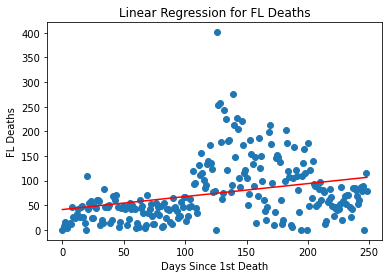

In [1088]:
#Plot the linear regression line
plt.scatter(days_since_deaths, FL_deaths)
plt.plot(days_since_deaths, FL_deaths_predict, color='red')
plt.title("Linear Regression for FL Deaths")
plt.xlabel("Days Since 1st Death")
plt.ylabel("FL Deaths")

In [1089]:
# Now to do polynomial regression for FL deaths
from sklearn.preprocessing import PolynomialFeatures

polynom = PolynomialFeatures(degree = 2)
FL_deaths_polynom = polynom.fit_transform(FL_deaths)

FL_deaths_polynom

array([[1.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00000e+00, 7.00000e+00, 4.90000e+01],
       [1.00000e+00, 1.60000e+01, 2.56000e+02],
       [1.00000e+00, 1.00000e+01, 1.00000e+02],
       [1.00000e+00, 3.00000e+00, 9.00000e+00],
       [1.00000e+00, 1.20000e+01, 1.44000e+02],
       [1.00000e+00, 1.40000e+01, 1.96000e+02],
       [1.00000e+00, 1.20000e+01, 1.44000e+02],
       [1.00000e+00, 4.70000e+01, 2.20900e+03],
       [1.00000e+00, 2.60000e+01, 6.76000e+02],
       [1.00000e+00, 2.50000e+01, 6.25000e+02],
       [1.00000e+00, 2.60000e+01, 6.76000e+02],
       [1.00000e+00, 3.30000e+01, 1.08900e+03],
       [1.00000e+00, 4.20000e+01, 1.76400e+03],
       [1.00000e+00, 2.70000e+01, 7.29000e+02],
       [1.00000e+00, 4.70000e+01, 2.20900e+03],
       [1.00000e+00, 4.90000e+01, 2.40100e+03],
       [1.00000e+00, 2.70000e+01, 7.29000e+02],
       [1.00000e+00, 1.50000e+01, 2.25000e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.10000e+02, 1.2100

In [1090]:
# Fitting the model for polynomial regression
PolyReg = linear_model.LinearRegression()
PolyReg.fit(FL_deaths_polynom, FL_deaths_predict)

LinearRegression()

Text(0, 0.5, 'FL Deaths')

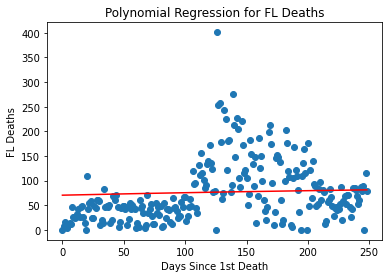

In [1091]:
# Visualize the polynomial regression line
#Plot the linear regression line
plt.scatter(days_since_deaths, FL_deaths)

plt.plot(days_since_deaths, PolyReg.predict(polynom.fit_transform(FL_deaths_predict)), color='red')
plt.title("Polynomial Regression for FL Deaths")
plt.xlabel("Days Since 1st Death")
plt.ylabel("FL Deaths")

In [1092]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Printing the RMSE
print('RMSE of FL deaths: {}'.format(sqrt(mean_squared_error(FL_deaths, FL_deaths_predict))))

RMSE of FL deaths: 57.67351769623458


<b> Above is the RMSE of FL deaths, which is 15.18</b>

# Now, lets get the top 5 counties in FL and create models for them

In [1093]:
confirmed_cases_FL.sort_values(by = '10/23/20', ascending = False)

,,,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,...,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20
countyFIPS,County Name,State,,,,,,,,,,,,,,,,,,,,,
12086,Miami-Dade County,FL,0,0,0,0,0,0,0,0,0,0,...,190728,191838,192646,194356,194879,195273,195991,197196,199072,200259
12011,Broward County,FL,0,0,0,0,0,2,2,4,4,7,...,89184,89751,90172,90997,91441,91704,92148,92657,93514,93868
12099,Palm Beach County,FL,0,0,0,0,0,0,0,0,0,0,...,54260,54624,55002,55449,55816,56145,56509,56907,57361,57661
12057,Hillsborough County,FL,1,1,1,1,1,1,1,1,1,2,...,49794,50127,50380,50790,51055,51296,51635,52014,52330,52481
12095,Orange County,FL,0,0,0,0,0,0,0,0,0,0,...,48015,48322,48596,48729,49029,49422,49752,50135,50446,50830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12013,Calhoun County,FL,0,0,0,0,0,0,0,0,0,0,...,746,752,754,757,760,766,776,781,791,792
12065,Jefferson County,FL,0,0,0,0,0,0,0,0,0,0,...,696,700,702,705,711,714,715,715,717,717
12041,Gilchrist County,FL,0,0,0,0,0,0,0,0,0,0,...,622,624,624,628,635,641,645,649,650,651


<b>Sorting the above we can see that the TOP 5 counties with the highest case rates are:
    <br>
    1.) Miami-Dade County
    <br>
    2.) Broward County
    <br>
    3.) Palm Beach County
    <br>
    4.) Hillsborough  and
    <br>
    5.) Orange!</b>
    
Now lets attach models!

<b> Starting with Miami-Dade County </b>

In [1094]:
# Picking Miami-Dade for regression model
cc_miamiDade = confirmed_import[confirmed_import['State']=='FL']

# Getting rid of 'Statewide Unallocated'
cc_miamiDade = cc_miamiDade.drop(columns=['stateFIPS'])
cc_miamiDade = cc_miamiDade[cc_miamiDade['County Name']=='Miami-Dade County']

# Only keeping days since first infections
cc_miamiDade = cc_miamiDade.drop(cc_miamiDade.loc[:, '1/22/20':'3/10/20'].columns, axis = 1)

# Setting the index after grabbing the county
cc_miamiDade = cc_miamiDade.set_index(['countyFIPS','County Name','State'])

cc_miamiDade

,,,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,...,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20
countyFIPS,County Name,State,,,,,,,,,,,,,,,,,,,,,
12086,Miami-Dade County,FL,0,2,8,13,13,23,43,77,101,142,...,190728,191838,192646,194356,194879,195273,195991,197196,199072,200259


In [1095]:
# Grabbing the sum
cc_miamiDade_sum = cc_miamiDade.sum()
cc_miamiDade_sum

3/11/20          0
3/12/20          2
3/13/20          8
3/14/20         13
3/15/20         13
             ...  
11/10/20    195273
11/11/20    195991
11/12/20    197196
11/13/20    199072
11/14/20    200259
Length: 249, dtype: int64

In [1096]:
# Creating dataframe 
cases_miamiDade = pd.DataFrame({'Cases':cc_miamiDade_sum})
cases_miamiDade['Days Since 1st Case'] = range(len(cases_miamiDade))
cases_miamiDade.Cases = cases_miamiDade.Cases.diff().fillna(0)
cases_miamiDade

,Cases,Days Since 1st Case
3/11/20,0.0,0
3/12/20,2.0,1
3/13/20,6.0,2
3/14/20,5.0,3
3/15/20,0.0,4
...,...,...
11/10/20,394.0,244
11/11/20,718.0,245
11/12/20,1205.0,246
11/13/20,1876.0,247


Intercept: [451.82563855]
Coefficient: [[2.84215624]]
Score: 0.05553386424797846


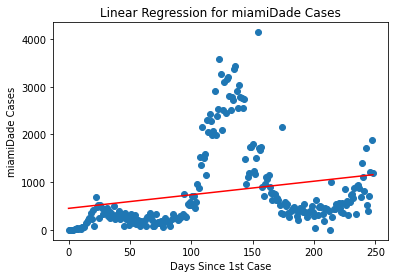

In [1097]:
# Make variables for linear regression
days_since_cases = pd.DataFrame(cases_miamiDade['Days Since 1st Case'])
miamiDade_cases = pd.DataFrame(cases_miamiDade['Cases'])

# Build Linear Regression Model
lm = linear_model.LinearRegression()
model = lm.fit(days_since_cases, miamiDade_cases)

# Predict values for the linear regression line
miamiDade_cases_predict = model.predict(days_since_cases)

#Plot the linear regression line
plt.scatter(days_since_cases, miamiDade_cases)
plt.plot(days_since_cases, miamiDade_cases_predict, color='red')
plt.title("Linear Regression for miamiDade Cases")
plt.xlabel("Days Since 1st Case")
plt.ylabel("miamiDade Cases")

print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))
print('Score: {}'.format(model.score(days_since_cases, miamiDade_cases)))

<b> Broward County </b>

In [1098]:
# Picking Broward county for regression model
cc_Broward = confirmed_import[confirmed_import['State']=='FL']

# Getting rid of 'Statewide Unallocated'
cc_Broward = cc_Broward.drop(columns=['stateFIPS'])
cc_Broward = cc_Broward[cc_Broward['County Name']=='Broward County']

# Only keeping days since first infections
cc_Broward = cc_Broward.drop(cc_Broward.loc[:, '1/22/20':'3/2/20'].columns, axis = 1)

# Setting the index after grabbing the county
cc_Broward = cc_Broward.set_index(['countyFIPS','County Name','State'])

cc_Broward

,,,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,...,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20
countyFIPS,County Name,State,,,,,,,,,,,,,,,,,,,,,
12011,Broward County,FL,0,0,0,0,2,2,4,4,7,11,...,89184,89751,90172,90997,91441,91704,92148,92657,93514,93868


In [1099]:
# Grabbing the sum
cc_Broward_sum = cc_Broward.sum()
cc_Broward_sum

3/3/20          0
3/4/20          0
3/5/20          0
3/6/20          0
3/7/20          2
            ...  
11/10/20    91704
11/11/20    92148
11/12/20    92657
11/13/20    93514
11/14/20    93868
Length: 257, dtype: int64

In [1100]:
# Creating dataframe 
cases_Broward = pd.DataFrame({'Cases':cc_Broward_sum})
cases_Broward['Days Since 1st Case'] = range(len(cases_Broward))
cases_Broward.Cases = cases_Broward.Cases.diff().fillna(0)
cases_Broward

,Cases,Days Since 1st Case
3/3/20,0.0,0
3/4/20,0.0,1
3/5/20,0.0,2
3/6/20,0.0,3
3/7/20,2.0,4
...,...,...
11/10/20,263.0,252
11/11/20,444.0,253
11/12/20,509.0,254
11/13/20,857.0,255


Intercept: [151.90371912]
Coefficient: [[1.66672982]]
Score: 0.0882571060302676


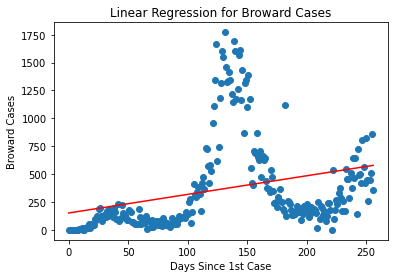

In [1101]:
# Make variables for linear regression
days_since_cases = pd.DataFrame(cases_Broward['Days Since 1st Case'])
Broward_cases = pd.DataFrame(cases_Broward['Cases'])

# Build Linear Regression Model
lm = linear_model.LinearRegression()
model = lm.fit(days_since_cases, Broward_cases)

# Predict values for the linear regression line
Broward_cases_predict = model.predict(days_since_cases)

#Plot the linear regression line
plt.scatter(days_since_cases, Broward_cases)
plt.plot(days_since_cases, Broward_cases_predict, color='red')
plt.title("Linear Regression for Broward Cases")
plt.xlabel("Days Since 1st Case")
plt.ylabel("Broward Cases")

print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))
print('Score: {}'.format(model.score(days_since_cases, Broward_cases)))

<b> Palm Beach County </b>

In [1102]:
# Picking Palm Beach county for regression model
cc_palmBeach = confirmed_import[confirmed_import['State']=='FL']

cc_palmBeach = cc_palmBeach.drop(columns=['stateFIPS'])
cc_palmBeach = cc_palmBeach[cc_palmBeach['County Name']=='PalmB each County']

# Only keeping days since first infections
cc_palmBeach = cc_palmBeach.drop(cc_palmBeach.loc[:, '1/22/20':'3/17/20'].columns, axis = 1)

# Setting the index after grabbing the county
cc_palmBeach = cc_palmBeach.set_index(['countyFIPS','County Name','State'])

cc_palmBeach

,,,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,...,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20
countyFIPS,County Name,State,,,,,,,,,,,,,,,,,,,,,


In [1103]:
# Grabbing the sum
cc_palmBeach_sum = cc_palmBeach.sum()
cc_palmBeach_sum

3/18/20     0.0
3/19/20     0.0
3/20/20     0.0
3/21/20     0.0
3/22/20     0.0
           ... 
11/10/20    0.0
11/11/20    0.0
11/12/20    0.0
11/13/20    0.0
11/14/20    0.0
Length: 242, dtype: float64

In [1104]:
# Creating dataframe 
cases_palmBeach = pd.DataFrame({'Cases':cc_palmBeach_sum})
cases_palmBeach['Days Since 1st Case'] = range(len(cases_palmBeach))
cases_palmBeach.Cases = cases_palmBeach.Cases.diff().fillna(0)
cases_palmBeach

,Cases,Days Since 1st Case
3/18/20,0.0,0
3/19/20,0.0,1
3/20/20,0.0,2
3/21/20,0.0,3
3/22/20,0.0,4
...,...,...
11/10/20,0.0,237
11/11/20,0.0,238
11/12/20,0.0,239
11/13/20,0.0,240


Intercept: [0.]
Coefficient: [[0.]]
Score: 1.0


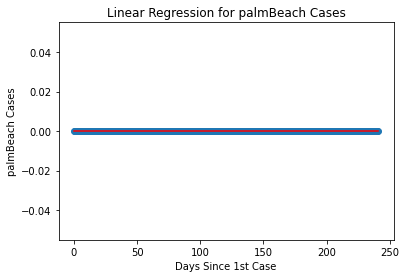

In [1105]:
# Make variables for linear regression
days_since_cases = pd.DataFrame(cases_palmBeach['Days Since 1st Case'])
palmBeach_cases = pd.DataFrame(cases_palmBeach['Cases'])

# Build Linear Regression Model
lm = linear_model.LinearRegression()
model = lm.fit(days_since_cases, palmBeach_cases)

# Predict values for the linear regression line
palmBeach_cases_predict = model.predict(days_since_cases)

#Plot the linear regression line
plt.scatter(days_since_cases, palmBeach_cases)
plt.plot(days_since_cases, palmBeach_cases_predict, color='red')
plt.title("Linear Regression for palmBeach Cases")
plt.xlabel("Days Since 1st Case")
plt.ylabel("palmBeach Cases")

print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))
print('Score: {}'.format(model.score(days_since_cases, palmBeach_cases)))

<b> Hillsborough County </b>

In [1106]:
# Picking Hillsborough county for regression model
cc_Hillsborough = confirmed_import[confirmed_import['State']=='FC']

cc_Hillsborough = cc_Hillsborough.drop(columns=['stateFIPS'])
cc_Hillsborough = cc_Hillsborough[cc_Hillsborough['County Name']=='Hillsborough County']

# Only keeping days since first infections
cc_Hillsborough = cc_Hillsborough.drop(cc_Hillsborough.loc[:, '1/22/20':'3/10/20'].columns, axis = 1)

# Setting the index after grabbing the county
cc_Hillsborough = cc_Hillsborough.set_index(['countyFIPS','County Name','State'])

cc_Hillsborough

,,,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,...,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20
countyFIPS,County Name,State,,,,,,,,,,,,,,,,,,,,,


In [1107]:
# Grabbing the sum
cc_Hillsborough_sum = cc_Hillsborough.sum()
cc_Hillsborough_sum

3/11/20     0.0
3/12/20     0.0
3/13/20     0.0
3/14/20     0.0
3/15/20     0.0
           ... 
11/10/20    0.0
11/11/20    0.0
11/12/20    0.0
11/13/20    0.0
11/14/20    0.0
Length: 249, dtype: float64

Intercept: [0.]
Coefficient: [[0.]]
Score: 1.0


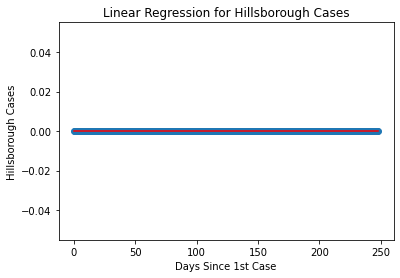

In [1108]:
# Creating dataframe 
cases_Hillsborough = pd.DataFrame({'Cases':cc_Hillsborough_sum})
cases_Hillsborough['Days Since 1st Case'] = range(len(cases_Hillsborough))
cases_Hillsborough.Cases = cases_Hillsborough.Cases.diff().fillna(0)

# Make variables for linear regression
days_since_cases = pd.DataFrame(cases_Hillsborough['Days Since 1st Case'])
Hillsborough_cases = pd.DataFrame(cases_Hillsborough['Cases'])

# Build Linear Regression Model
lm = linear_model.LinearRegression()
model = lm.fit(days_since_cases, Hillsborough_cases)

# Predict values for the linear regression line
Hillsborough_cases_predict = model.predict(days_since_cases)

#Plot the linear regression line
plt.scatter(days_since_cases, Hillsborough_cases)
plt.plot(days_since_cases, Hillsborough_cases_predict, color='red')
plt.title("Linear Regression for Hillsborough Cases")
plt.xlabel("Days Since 1st Case")
plt.ylabel("Hillsborough Cases")

print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))
print('Score: {}'.format(model.score(days_since_cases, Hillsborough_cases)))

<b> Orange County </b>

In [1109]:
# Picking Orange county for regression model
cc_Orange = confirmed_import[confirmed_import['State']=='FL']

cc_Orange = cc_Orange.drop(columns=['stateFIPS'])
cc_Orange = cc_Orange[cc_Orange['County Name']=='Orange County']

# Only keeping days since first infections
cc_Orange = cc_Orange.drop(cc_Orange.loc[:, '1/22/20':'3/10/20'].columns, axis = 1)

# Setting the index after grabbing the county
cc_Orange = cc_Orange.set_index(['countyFIPS','County Name','State'])

cc_Orange

,,,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,...,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20
countyFIPS,County Name,State,,,,,,,,,,,,,,,,,,,,,
12095,Orange County,FL,0,0,1,2,2,3,6,11,19,23,...,48015,48322,48596,48729,49029,49422,49752,50135,50446,50830


In [1110]:
# Grabbing the sum
cc_Orange_sum = cc_Orange.sum()
cc_Orange_sum

3/11/20         0
3/12/20         0
3/13/20         1
3/14/20         2
3/15/20         2
            ...  
11/10/20    49422
11/11/20    49752
11/12/20    50135
11/13/20    50446
11/14/20    50830
Length: 249, dtype: int64

Intercept: [78.45490763]
Coefficient: [[1.0135616]]
Score: 0.09806676371249512


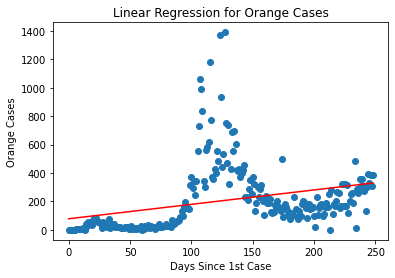

In [1111]:
# Creating dataframe 
cases_Orange = pd.DataFrame({'Cases':cc_Orange_sum})
cases_Orange['Days Since 1st Case'] = range(len(cases_Orange))
cases_Orange.Cases = cases_Orange.Cases.diff().fillna(0)

# Make variables for linear regression
days_since_cases = pd.DataFrame(cases_Orange['Days Since 1st Case'])
Orange_cases = pd.DataFrame(cases_Orange['Cases'])

# Build Linear Regression Model
lm = linear_model.LinearRegression()
model = lm.fit(days_since_cases, Orange_cases)

# Predict values for the linear regression line
Orange_cases_predict = model.predict(days_since_cases)

#Plot the linear regression line
plt.scatter(days_since_cases, Orange_cases)
plt.plot(days_since_cases, Orange_cases_predict, color='red')
plt.title("Linear Regression for Orange Cases")
plt.xlabel("Days Since 1st Case")
plt.ylabel("Orange Cases")

print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))
print('Score: {}'.format(model.score(days_since_cases, Orange_cases)))

# Now to calculate the point of no-return for FL

In [1112]:
# Importing the hospital beds dataset
beds_import = pd.read_csv('../Data/Input/Definitive_Healthcare_Hospital_Beds_0914.csv')

# Picking FL hospitals
beds_FL = beds_import[beds_import['HQ_STATE']=='FL']

# Dropping un-needed columns
beds_FL = beds_FL.drop(columns=['X', 'Y', 'OBJECTID', 'HOSPITAL_NAME', 'HOSPITAL_TYPE', 'HQ_ADDRESS', 'HQ_ADDRESS1', 'HQ_CITY', 'HQ_STATE', 'HQ_ZIP_CODE', 'COUNTY_NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'AVG_VENTILATOR_USAGE', 'Potential_Increase_In_Bed_Capac', 'PEDI_ICU_BEDS', 'ADULT_ICU_BEDS', 'NUM_STAFFED_BEDS', 'NUM_LICENSED_BEDS'])

beds_FL = beds_FL.sum()

beds_FL

NUM_ICU_BEDS       6231.000000
BED_UTILIZATION     146.945866
dtype: float64

### As we can see, there are 2648 ICU beds across FL

### Deaths per day in FL starting from the day of the 1st death

In [1113]:
deaths_FL = deaths_import[deaths_import['State']=='FL']

deaths_FL = deaths_FL[deaths_FL.countyFIPS > 0]
deaths_FL = deaths_FL.drop(columns=['stateFIPS'])

# Only keeping days since first death
deaths_FL = deaths_FL.drop(deaths_FL.loc[:, '1/22/20':'3/24/20'].columns, axis = 1)

# Setting the index
deaths_FL = deaths_FL.set_index(['countyFIPS','County Name','State'])

deaths_FL_sum = deaths_FL.sum()
deaths_FL_sum

3/25/20        23
3/26/20        30
3/27/20        46
3/28/20        56
3/29/20        59
            ...  
11/24/20    18157
11/25/20    18247
11/26/20    18247
11/27/20    18363
11/28/20    18442
Length: 249, dtype: int64

In [1114]:
# Summarizing weekly deaths for FL to make the data easier to view on a graph
weekly_deaths = {}
week_number = 1

weekly_deaths[0] = [deaths_FL.columns[3], deaths_FL_sum[3]]
lastDayOfWeek = 3

# Looping through and adding weekly cases for each state
for start in range(10,deaths_FL_sum.size,7):
    weekly_deaths[week_number] = [deaths_FL.columns[start], deaths_FL_sum[start] - deaths_FL_sum[lastDayOfWeek]]
    week_number += 1
    lastDayOfWeek = start
    
deaths = pd.DataFrame.from_dict(weekly_deaths,orient='index',columns=['Week Of','FL Deaths'])
deaths = deaths.set_index(['Week Of'])
deaths

,FL Deaths
Week Of,
3/28/20,56
4/4/20,139
4/11/20,251
4/18/20,304
4/25/20,304
5/2/20,310
5/9/20,349
5/16/20,250
5/23/20,269


In [1115]:
# looping through and dividing ICU bed utilization by occupancy 
for deaths_new in deaths:
    deaths[deaths_new] = (deaths[deaths_new] / 2648) / 0.70 # percent ICU utilization in FL divided by occupancy
    
deaths

,FL Deaths
Week Of,
3/28/20,0.030211
4/4/20,0.074989
4/11/20,0.135412
4/18/20,0.164005
4/25/20,0.164005
5/2/20,0.167242
5/9/20,0.188282
5/16/20,0.134873
5/23/20,0.145123


Text(0.5, 1.0, 'Point of no return for FL')

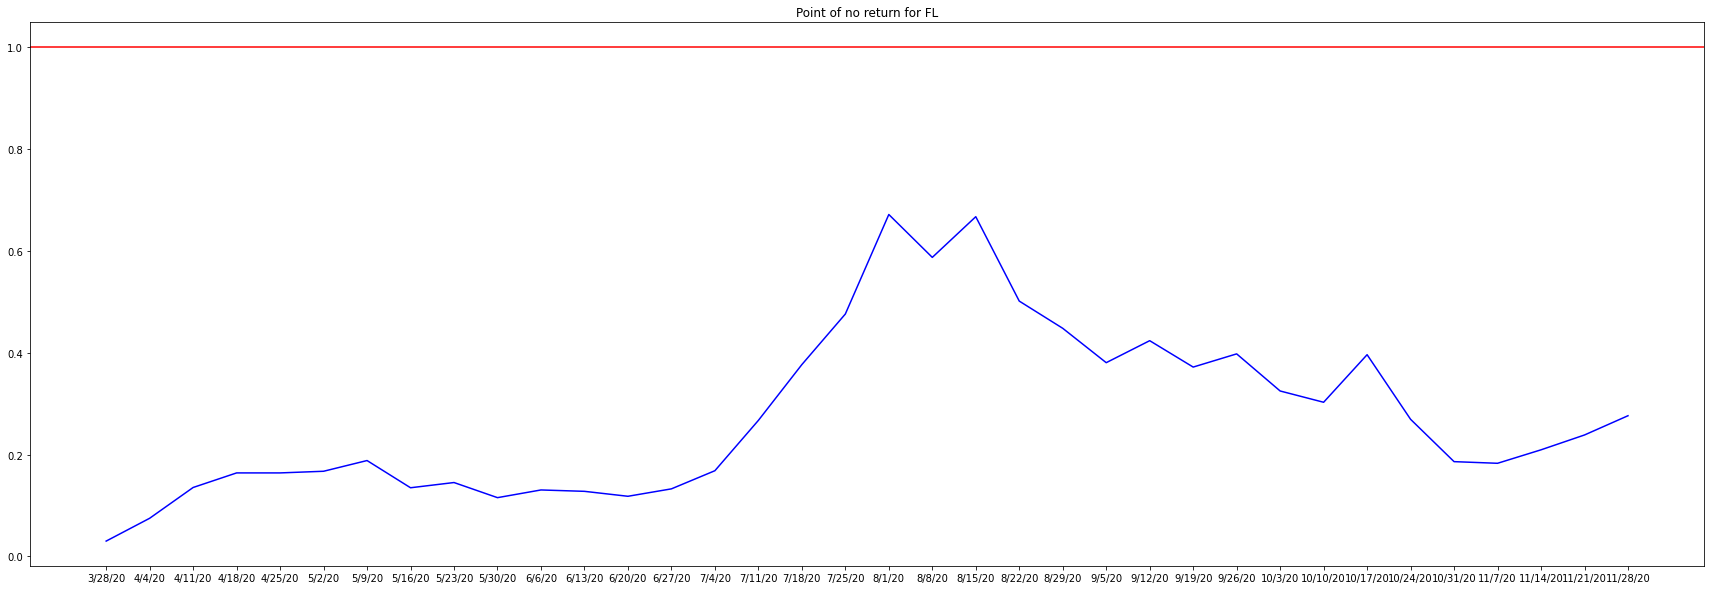

In [1116]:
plt.figure(figsize=(30,10))
plt.plot(deaths.index, deaths['FL Deaths'], color='b')
plt.axhline(1, color='red') # red bar at 1 indicates a 100% capacity of ICU beds
plt.title('Point of no return for FL')

In [1117]:
# Get data ready for FL cases
confirmed_cases_FL = confirmed_import[confirmed_import['State']=='FL']

# Getting rid of 'Statewide Unallocated'
confirmed_cases_FL = confirmed_cases_FL[confirmed_cases_FL.countyFIPS > 0]
confirmed_cases_FL = confirmed_cases_FL.drop(columns=['stateFIPS'])

# Only keeping days since first infections
confirmed_cases_FL = confirmed_cases_FL.drop(confirmed_cases_FL.loc[:, '1/22/20':'3/2/20'].columns, axis = 1)

# Setting the index
confirmed_cases_FL = confirmed_cases_FL.set_index(['countyFIPS','County Name','State'])

confirmed_cases_FL

,,,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,...,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20
countyFIPS,County Name,State,,,,,,,,,,,,,,,,,,,,,
12001,Alachua County,FL,0,0,0,0,0,0,0,1,1,1,...,10996,11047,11082,11123,11261,11347,11450,11554,11631,11651
12003,Baker County,FL,0,0,0,0,0,0,0,0,0,0,...,1840,1844,1847,1852,1856,1869,1872,1880,1888,1893
12005,Bay County,FL,0,0,0,0,0,0,0,0,0,0,...,7060,7087,7108,7139,7219,7279,7350,7389,7440,7504
12007,Bradford County,FL,0,0,0,0,0,0,0,0,0,0,...,1254,1258,1259,1267,1271,1279,1289,1292,1295,1296
12009,Brevard County,FL,0,0,0,0,0,0,0,0,0,0,...,12318,12429,12572,12680,12780,12925,13092,13167,13312,13452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,Union County,FL,0,0,0,0,0,0,0,0,0,0,...,1172,1174,1175,1177,1180,1187,1190,1190,1190,1191
12127,Volusia County,FL,0,0,0,0,0,1,2,2,2,3,...,13360,13439,13557,13653,13748,13828,13937,13986,14117,14158
12129,Wakulla County,FL,0,0,0,0,0,0,0,0,0,0,...,1357,1369,1374,1386,1387,1407,1418,1430,1446,1448


In [1118]:
# Getting the sum of cases
cc_FL_sum = confirmed_cases_FL.sum()
cc_FL_sum

3/3/20           1
3/4/20           1
3/5/20           2
3/6/20           2
3/7/20           6
             ...  
11/10/20    850147
11/11/20    855950
11/12/20    861562
11/13/20    868496
11/14/20    873020
Length: 257, dtype: int64

In [1119]:
# Summarizing weekly cases
weekly_cases = {}
week_number = 1

weekly_cases[0] = [confirmed_cases_FL.columns[3], cc_FL_sum[3], cc_FL_sum[3]]
lastDayOfWeek = 3

# Looping through and adding weekly cases for each state
for start in range(10,cc_FL_sum.size,7):
    weekly_cases[week_number] = [confirmed_cases_FL.columns[start], cc_FL_sum[start] - cc_FL_sum[lastDayOfWeek], cc_FL_sum[start] - cc_FL_sum[lastDayOfWeek]]
    week_number += 1
    lastDayOfWeek = start
    
cases_frame = pd.DataFrame.from_dict(weekly_cases,orient='index',columns=['Week Of','Cases', 'Previous Week Cases'])
#cases_frame = cases_frame.set_index(['Week Of'])
cases_frame['Week'] = range(len(cases_frame))
cases_frame = cases_frame.drop(columns=['Week Of'])
cases_frame

,Cases,Previous Week Cases,Week
0,2,2,0
1,62,62,1
2,585,585,2
3,2549,2549,3
4,7060,7060,4
5,7708,7708,5
6,6778,6778,6
7,5789,5789,7
8,4184,4184,8
9,4446,4446,9


In [1120]:
sns.lineplot(data=cases_frame, x='Weeks Since 1st Case', y='Orange Cases')

ValueError: Could not interpret value `Weeks Since 1st Case` for parameter `x`

In [ ]:
# Shifting row down for previous weeks cases column
cases_frame['Previous'] = cases_frame['Previous Week Cases'].shift(1).fillna(0)
cases_frame

In [ ]:
cases_frame = cases_frame.drop(columns=['Previous Week Cases'])
cases_frame